In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [169]:
hr_train=pd.read_csv('Hr Analytics Train.csv')
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [170]:
hr_test=pd.read_csv('Hr Analytics Test.csv')
hr_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [171]:
combined_hr=pd.concat([hr_train, hr_test], ignore_index=True)
hr_train.shape, hr_test.shape, combined_hr.shape

((54808, 14), (23490, 13), (78298, 14))

In [172]:
combined_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [173]:
# Dropping the EmployeeID column as it won't add anything to our further analysis
combined_hr.drop(columns='employee_id', inplace=True)

### Treating the Missing Values

In [174]:
combined_hr.isnull().sum()

department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [6]:
# Imputing Values for Education
combined_hr[combined_hr['education'].isnull()]['is_promoted'].value_counts()

is_promoted
0.0    2287
1.0     122
Name: count, dtype: int64

In [70]:
combined_hr['education'].mode()[0]

"Bachelor's"

In [201]:
combined_hr['education'].fillna(combined_hr['education'].mode()[0], inplace=True)

In [72]:
combined_hr.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [78]:
# Imputing Values for Previous Year Rating
combined_hr['previous_year_rating'].value_counts()

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [196]:
combined_hr[combined_hr['length_of_service']==1].shape[0]

6539

In [198]:
combined_hr[combined_hr['length_of_service']==1].isnull().sum()

department                 0
region                     0
education                626
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted             1992
dtype: int64

### Conclusion:
So basically, all the missing values in previous_year_rating column, is for the people who have length of service=1. Which possibly signifies that people who have missing values joined recently and hence their previous year rating is null.

In [199]:
combined_hr['previous_year_rating'].fillna(0.0, inplace=True)

In [202]:
combined_hr.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

### Separating Categorical and Numerical Column for further analysis

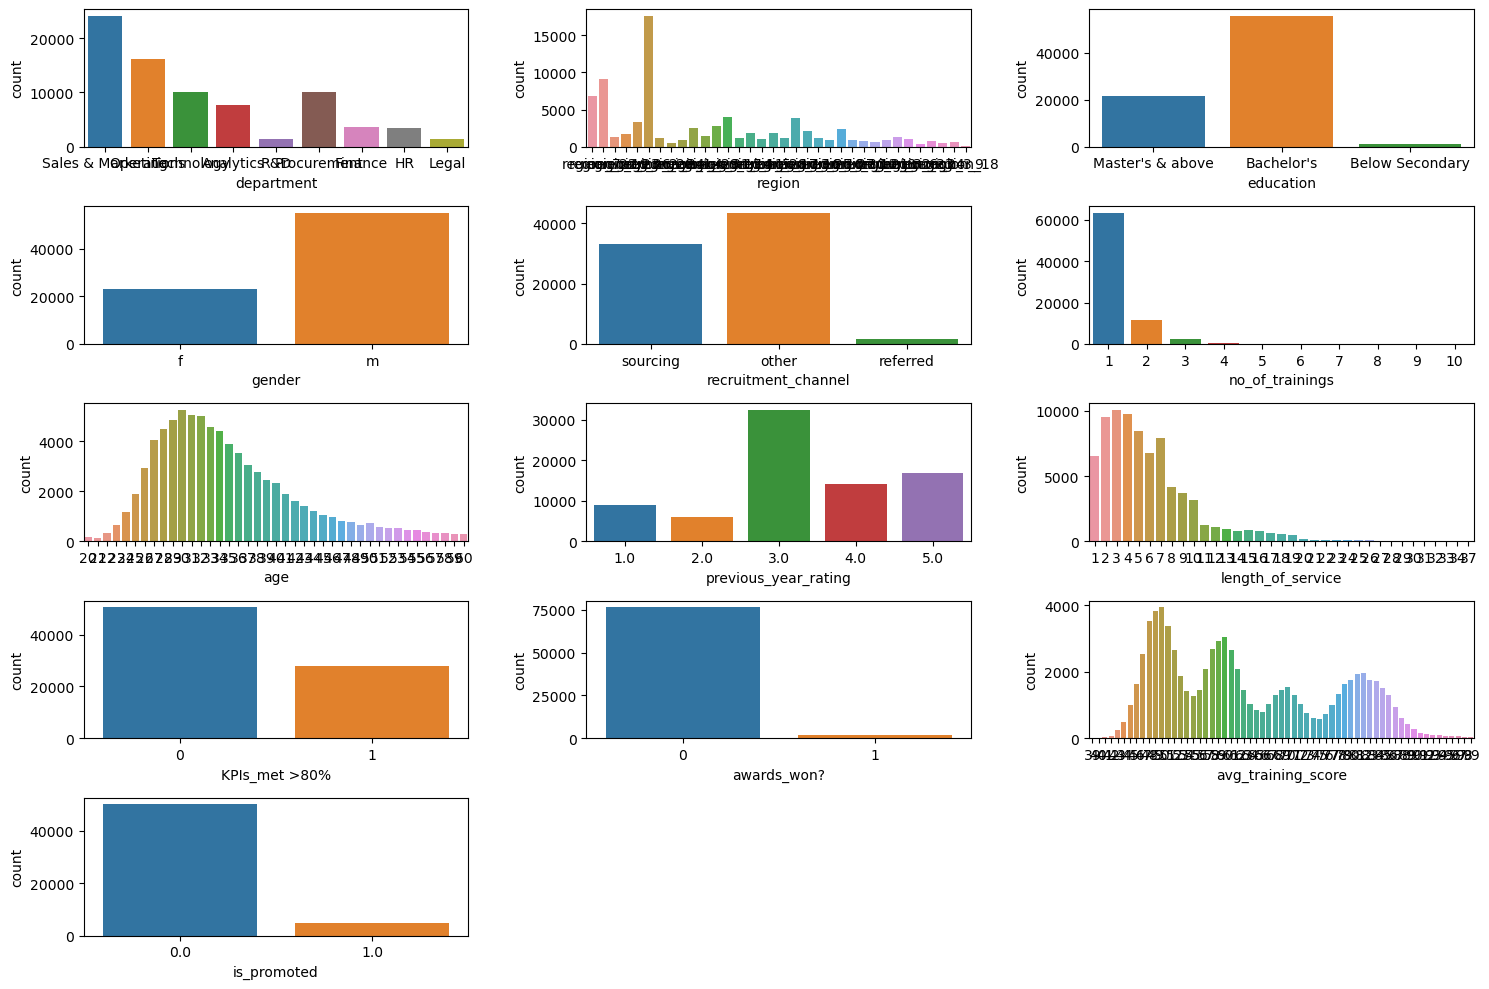

In [127]:
plt.figure(figsize=(15, 10))
t=1
for i in combined_hr.columns:
    plt.subplot(5, 3, t)
    sns.countplot(x=combined_hr[i])
    t=t+1
plt.tight_layout()
plt.show()

In [109]:
combined_hr.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [203]:
cat_cols=['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 
         'KPIs_met >80%', 'awards_won?']
num_cols=['age', 'length_of_service','avg_training_score']

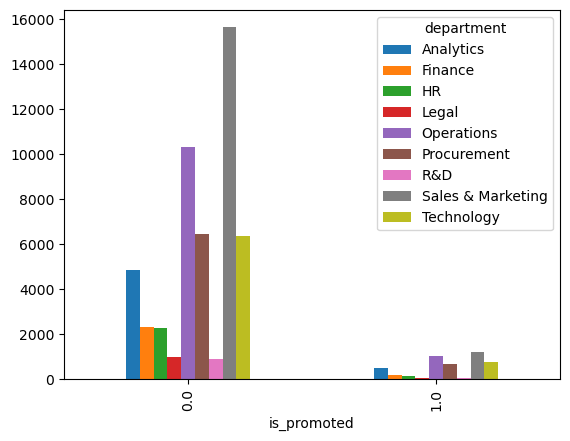

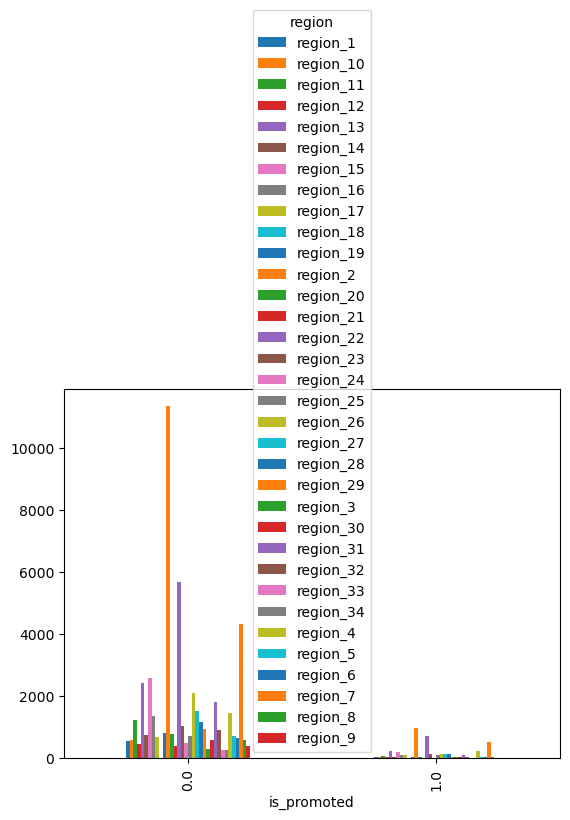

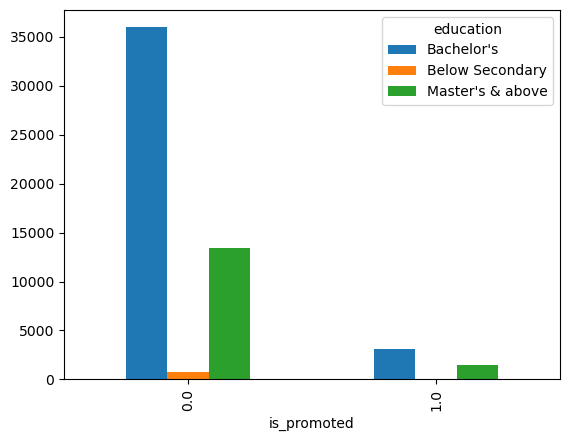

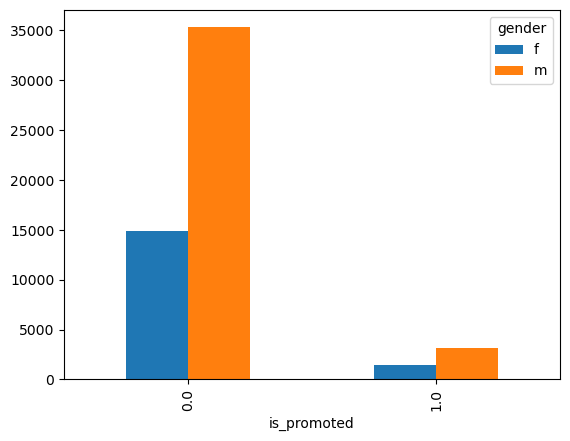

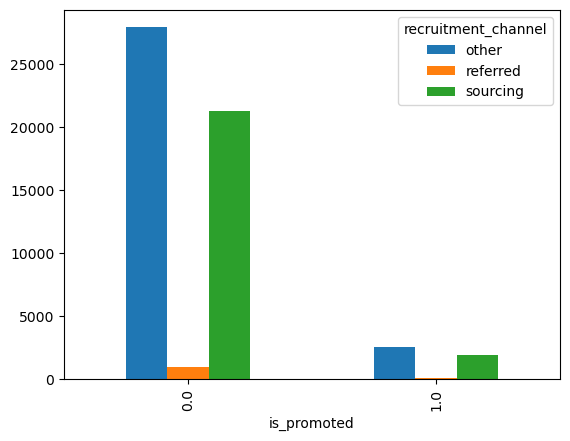

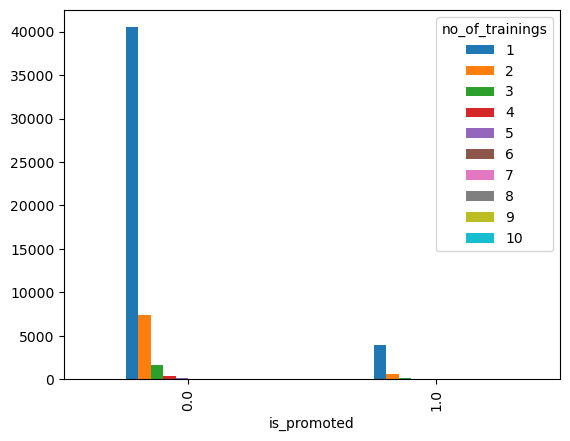

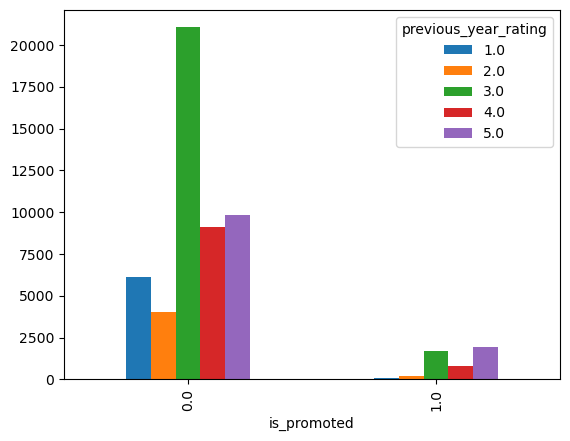

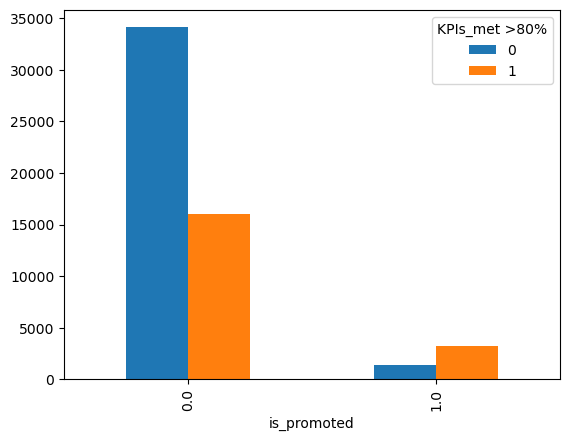

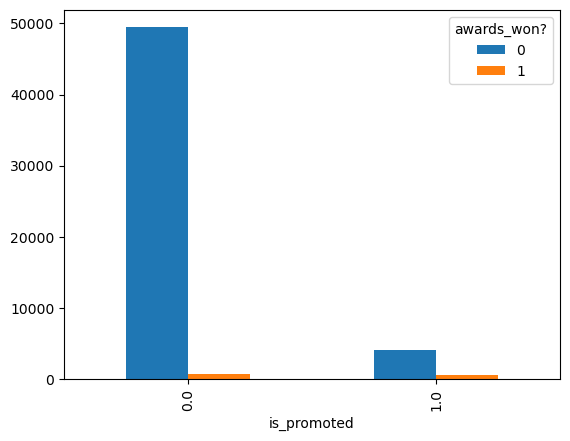

In [111]:
# Bivariate Analysis for Categorical Variables:

for i in cat_cols:
    pd.crosstab(index=combined_hr['is_promoted'], columns=combined_hr[i]).plot(kind='bar')

In [204]:
# Statistical Tests for Numerical Variables
import scipy.stats as stats
di={}
significant_columns=[]
insignificant_columns=[]
for i in cat_cols:
    freq=pd.crosstab(index=combined_hr['is_promoted'], columns=combined_hr[i])
    p_value=stats.chi2_contingency(freq)[1]
    di[i]=p_value
    if p_value <0.05:
        significant_columns.append(i)
    else:
        insignificant_columns.append(i)
print(di)
print('\nSignificant_Columns: ', significant_columns)
print('\nInsignificant_Columns: ', insignificant_columns)

{'department': 9.882497107474489e-29, 'region': 7.275378205784026e-80, 'education': 5.380808967160731e-11, 'gender': 0.009765091521176657, 'recruitment_channel': 6.650937825577018e-05, 'no_of_trainings': 5.64626821736642e-05, 'previous_year_rating': 0.0, 'KPIs_met >80%': 0.0, 'awards_won?': 0.0}

Significant_Columns:  ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']

Insignificant_Columns:  []


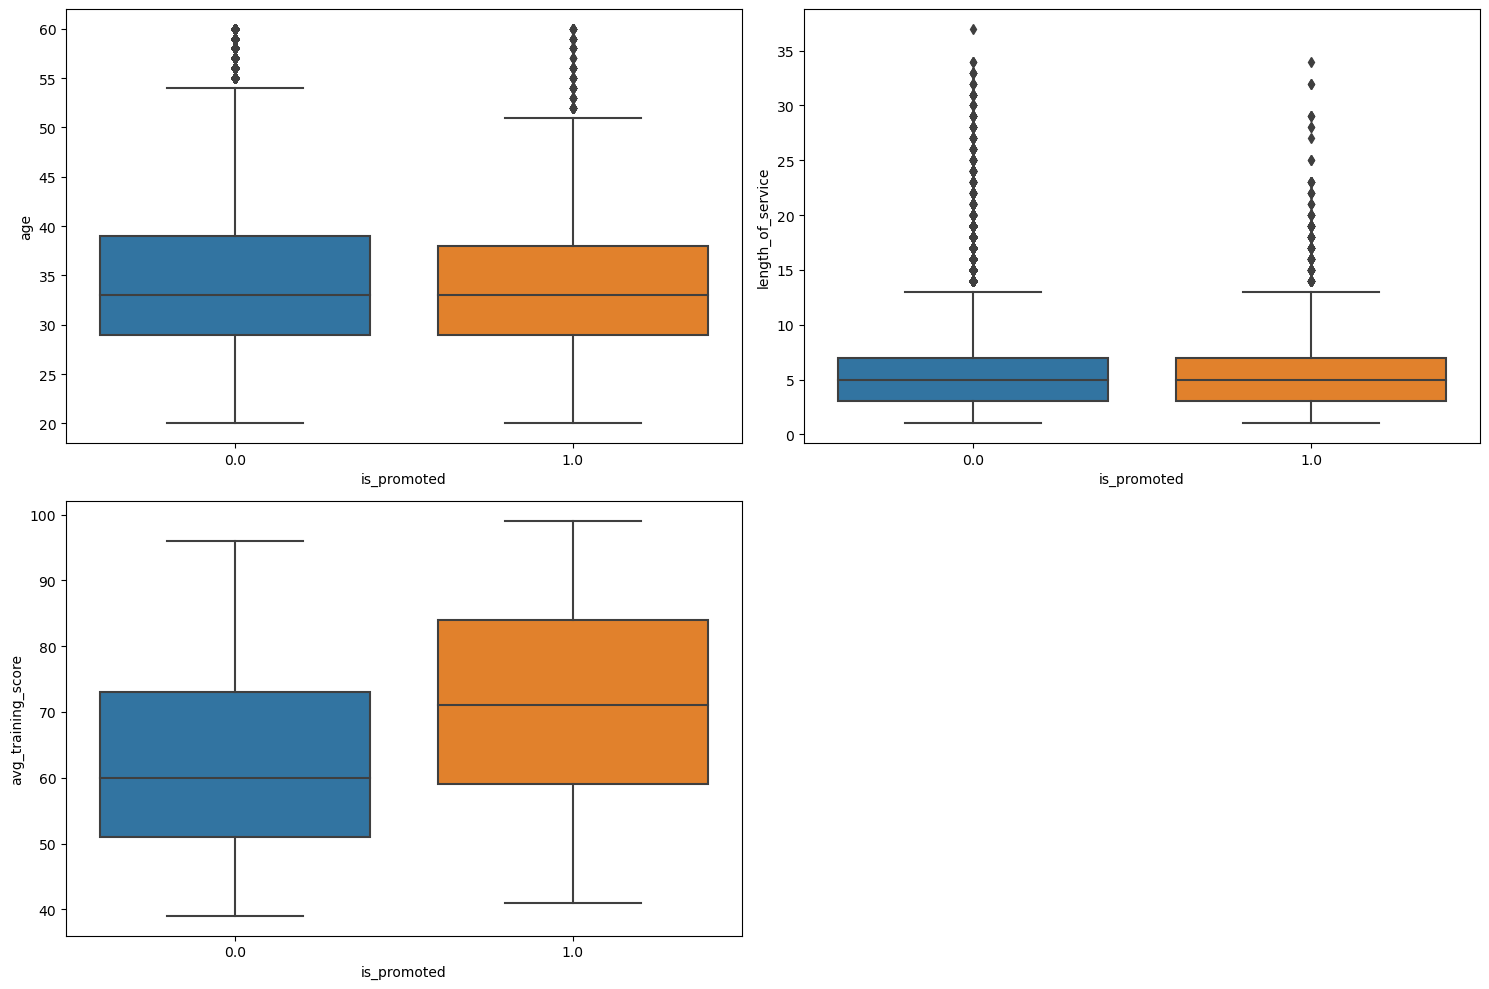

In [114]:
# Bivariate Analysis for Numerical Variables:
plt.figure(figsize=(15, 10))
t=1
for i in num_cols:
    plt.subplot(2, 2, t)
    sns.boxplot(x=combined_hr['is_promoted'], y=combined_hr[i])
    t=t+1

plt.tight_layout()
plt.show()

In [205]:
# Statistical Test for Numerical Variables:
di={}
for i in num_cols:
    samp_yes=combined_hr[combined_hr.is_promoted==1.0][i]
    samp_no=combined_hr[combined_hr.is_promoted==0.0][i]
    p_value=stats.ttest_ind(samp_yes, samp_no)[1]
    di[i]=p_value
    if p_value<0.05:
        significant_columns.append(i)
    else:
        insignificant_columns.append(i)

print(di)
print(significant_columns)
print(insignificant_columns)

{'age': 5.846304662205338e-05, 'length_of_service': 0.012491446010434766, 'avg_training_score': 0.0}
['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'age', 'length_of_service', 'avg_training_score']
[]


### Feature Engineering and Feature Transformations

In [47]:
combined_hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [57]:
pd.crosstab(index=combined_hr['is_promoted'], columns=combined_hr['region']).T.sort_values(by=1.0, ascending=False)

is_promoted,0.0,1.0
region,,
region_2,11354,989
region_22,5694,734
region_7,4327,516
region_4,1457,246
region_13,2418,230
region_15,2586,222
region_28,1164,154
region_26,2117,143
region_23,1038,137


In [206]:
re=['region_2', 'region_22', 'region_7', 'region_4', 'region_13',
       'region_15', 'region_28', 'region_26', 'region_23', 'region_27',
       'region_31', 'region_17', 'region_25', 'region_16']
def region(text):
    if text in re:
        return 1
    else:
        return 0

In [207]:
combined_hr['region']=combined_hr['region'].apply(region)

In [141]:
combined_hr.head(1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,1,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0


In [149]:
hr_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


### Encoding

In [208]:
dummy=pd.get_dummies(combined_hr, drop_first=True, dtype=int)

### Model Building and Evaluation

In [209]:
test_data=dummy.iloc[hr_train.shape[0]:]
train_data=dummy.iloc[:hr_train.shape[0], :]

In [211]:
x=train_data.drop(columns='is_promoted')
y=train_data['is_promoted']
x.shape, y.shape

((54808, 21), (54808,))

In [210]:
test_data.drop(columns='is_promoted', inplace=True)

In [213]:
#libraries for Splitting, Cross Validation and HyperParameterTuning
from sklearn.model_selection import train_test_split , GridSearchCV, StratifiedKFold

# Libraries for Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Libraries for Metrics to Evaluate the model's performance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

In [216]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.30, random_state=38, shuffle=True, stratify=y)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((38365, 21), (16443, 21), (38365,), (16443,))

In [18]:
models=[]
mean_accuracy=[]
mean_recall=[]
mean_precision=[]
mean_f1=[]
def Evaluation(model):
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kfold.split(xtrain, ytrain):
        model=model
        model.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
        pred=model.predict(xtrain.iloc[test_index])
        accuracy.append(accuracy_score(y_true=ytrain.iloc[test_index], y_pred=pred))
        precision.append(precision_score(y_true=ytrain.iloc[test_index], y_pred=pred))
        recall.append(recall_score(y_true=ytrain.iloc[test_index], y_pred=pred))
        f1.append(f1_score(y_true=ytrain.iloc[test_index], y_pred=pred))
    
    print('Accuracy:', np.mean(accuracy))
    print('Precision: ', np.mean(precision))
    print('Recall: ', np.mean(recall))
    print('F1Score: ', np.mean(f1))
    models.append(str(model))
    mean_accuracy.append(np.mean(accuracy))
    mean_precision.append(np.mean(precision))
    mean_recall.append(np.mean(recall))
    mean_f1.append(np.mean(f1))

In [19]:
#Logistic Regression
Evaluation(LogisticRegression())

Accuracy: 0.9177248812903311
Precision:  0.5881769596776213
Recall:  0.12025351538618301
F1Score:  0.19908819213568657


In [20]:
# Naive Bayes
Evaluation(GaussianNB())

Accuracy: 0.8935677481218413
Precision:  0.30334774501101125
Recall:  0.19194619930711226
F1Score:  0.23495082594475086


In [21]:
# Decision Tree
Evaluation(DecisionTreeClassifier())

Accuracy: 0.8968277424685983
Precision:  0.4049681711719016
Recall:  0.45101202363969833
F1Score:  0.42647817406227706


In [22]:
# Random Forest
Evaluation(RandomForestClassifier())

Accuracy: 0.934291856758908
Precision:  0.7720953653400675
Recall:  0.3244837986549827
F1Score:  0.4564847095254767


In [23]:
# Gradient Boosting
Evaluation(GradientBoostingClassifier())

Accuracy: 0.9397168307007604
Precision:  0.9590065448339997
Recall:  0.30534094151212554
F1Score:  0.46312412520892365


In [24]:
# AdaBoost Classifier
Evaluation(AdaBoostClassifier())

Accuracy: 0.9236364909759525
Precision:  0.7199506974506974
Recall:  0.17081353168942326
F1Score:  0.2754816775030298


In [25]:
# XGBOOST
Evaluation(XGBClassifier())

Accuracy: 0.9408358922991239
Precision:  0.8807420682264947
Recall:  0.3533287140819238
F1Score:  0.5040135762825758


In [28]:
model_performance=pd.DataFrame({'Model_Name':models, 'Accuracy': mean_accuracy, 'Precision':mean_precision, 
                 'Recall': mean_recall, 'F1_Score': mean_f1})
model_performance.sort_values(by='F1_Score', ascending=False)

,Model_Name,Accuracy,Precision,Recall,F1_Score
6,"XGBClassifier(base_score=None, booster=None, c...",0.940836,0.880742,0.353329,0.504014
4,GradientBoostingClassifier(),0.939717,0.959007,0.305341,0.463124
3,RandomForestClassifier(),0.934292,0.772095,0.324484,0.456485
2,DecisionTreeClassifier(),0.896828,0.404968,0.451012,0.426478
5,AdaBoostClassifier(),0.923636,0.719951,0.170814,0.275482
1,GaussianNB(),0.893568,0.303348,0.191946,0.234951
0,LogisticRegression(),0.917725,0.588177,0.120254,0.199088


#### Let's HyperParameterTune Logistic Regression

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     15043
         1.0       0.57      0.12      0.20      1400

    accuracy                           0.92     16443
   macro avg       0.75      0.56      0.58     16443
weighted avg       0.89      0.92      0.89     16443



<Axes: >

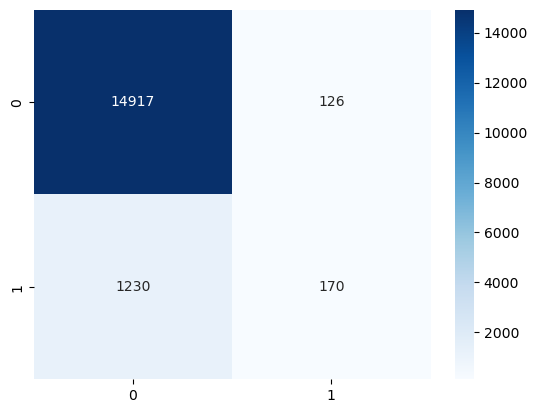

In [218]:
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
predict=lr.predict(xtest)
print(classification_report(y_true=ytest, y_pred=predict))
sns.heatmap(confusion_matrix(y_true=ytest, y_pred=predict), annot=True, fmt='g', cmap='Blues')

In [225]:
param={'penalty' : ['l1', 'l2', 'elasticnet', None], 
       'class_weight': [{0:1, 1:1},{0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}],
        'solver' : ['lbfgs', 'liblinear', 'saga'], 'max_iter' :[100, 200, 400, 500, 1000]}
kfold=StratifiedKFold(n_splits=5)

In [227]:
gsv=GridSearchCV(estimator=LogisticRegression(), param_grid=param, cv=kfold, scoring='f1', n_jobs=-1, verbose=1)

In [ ]:
gsv.best_par

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier

In [117]:
# Let's HyperParameter Tune Decision Tree
param={'criterion': ["gini", "entropy", "log_loss"], 'max_depth' : [7, 9, 11, 13, 15,17, None], 
        'max_features' :["auto", "sqrt", "log2"], 
       'class_weight': [{0:1, 1:1},{0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}]}
kf=StratifiedKFold(n_splits=5, shuffle=True)
gs=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param, scoring='f1', cv=kf, n_jobs=-1, verbose=1)

In [118]:
gs.fit(xtrain, ytrain)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 1.5},
                                          {0: 1, 1: 2}, {0: 1, 1: 2.5},
                                          {0: 1, 1: 3}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 9, 11, 13, 15, 17, None],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1', verbose=1)

In [119]:
gs.best_params_

{'class_weight': {0: 1, 1: 2},
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'sqrt'}

In [120]:
gs.best_score_

0.41922182381854317

In [137]:
df=pd.DataFrame(gs.cv_results_)[['param_criterion', 'param_max_features', 'param_class_weight',
                              'param_max_depth','mean_test_score']].sort_values(by='mean_test_score', ascending=False, ignore_index=True)
df.head(20)

,param_criterion,param_max_features,param_class_weight,param_max_depth,mean_test_score
0,log_loss,sqrt,"{0: 1, 1: 2}",None,0.419222
1,entropy,sqrt,"{0: 1, 1: 3}",None,0.415556
2,gini,sqrt,"{0: 1, 1: 2}",13,0.409203
3,log_loss,log2,"{0: 1, 1: 3}",13,0.408344
4,entropy,sqrt,"{0: 1, 1: 2}",17,0.408233
5,log_loss,log2,"{0: 1, 1: 1.5}",17,0.408202
6,gini,log2,"{0: 1, 1: 2.5}",17,0.407537
7,entropy,log2,"{0: 1, 1: 2.5}",17,0.407501
8,log_loss,log2,"{0: 1, 1: 2.5}",17,0.407443
9,entropy,log2,"{0: 1, 1: 2}",None,0.406130


In [138]:
best_params=df.iloc[2]
best_params

param_criterion               gini
param_max_features            sqrt
param_class_weight    {0: 1, 1: 2}
param_max_depth                 13
mean_test_score           0.409203
Name: 2, dtype: object

In [146]:
dtree=DecisionTreeClassifier(criterion='gini', max_depth=17, class_weight={0:1, 1:3}, max_features='sqrt')
dtree.fit(x, y)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=17,
                       max_features='sqrt')

In [155]:
pred=dtree.predict(test_data)
pred

array([1, 0, 0, ..., 0, 0, 1])

In [161]:
employee_id=hr_test.employee_id
submission=pd.DataFrame({'employee_id':employee_id, 'is_promoted': pred})
submission.to_csv('Decision_Tree.csv', index=False)

In [152]:
test_data.drop(columns='is_promoted', inplace=True)

In [145]:
print(classification_report(ytest, dtree.predict(xtest)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15043
           1       0.41      0.38      0.39      1400

    accuracy                           0.90     16443
   macro avg       0.68      0.66      0.67     16443
weighted avg       0.90      0.90      0.90     16443



In [162]:
# Let's HyperParameterTune XGBOOST
xgb=XGBClassifier()
xgb.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [167]:
pred=xgb.predict(test_data)
submission=pd.DataFrame({'employee_id':employee_id, 'is_promoted':pred})
submission.to_csv('Simple_XGBOOST.csv', index=False)

In [166]:
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [255]:
params= {'min_impurity_decrease':[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], 
         'class_weight': [{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
        'max_depth': [4, 5, 6, 7, 8, 9, 10]}
kfold=StratifiedKFold(n_splits=5, shuffle=True)

In [47]:
dtree=DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.25)
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.25)

In [50]:
Evaluation(DecisionTreeClassifier())

Accuracy: 0.895686172292454
Precision:  0.40008099506395495
Recall:  0.45010607359118815
F1Score:  0.42326562672881723


In [102]:
dtree=DecisionTreeClassifier(max_features='sqrt', min_impurity_decrease=0.002)
dtree.fit(xtrain, ytrain)

pred=dtree.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15043
           1       0.65      0.05      0.10      1400

    accuracy                           0.92     16443
   macro avg       0.78      0.53      0.53     16443
weighted avg       0.90      0.92      0.88     16443



In [103]:
dtree.get_depth()

2

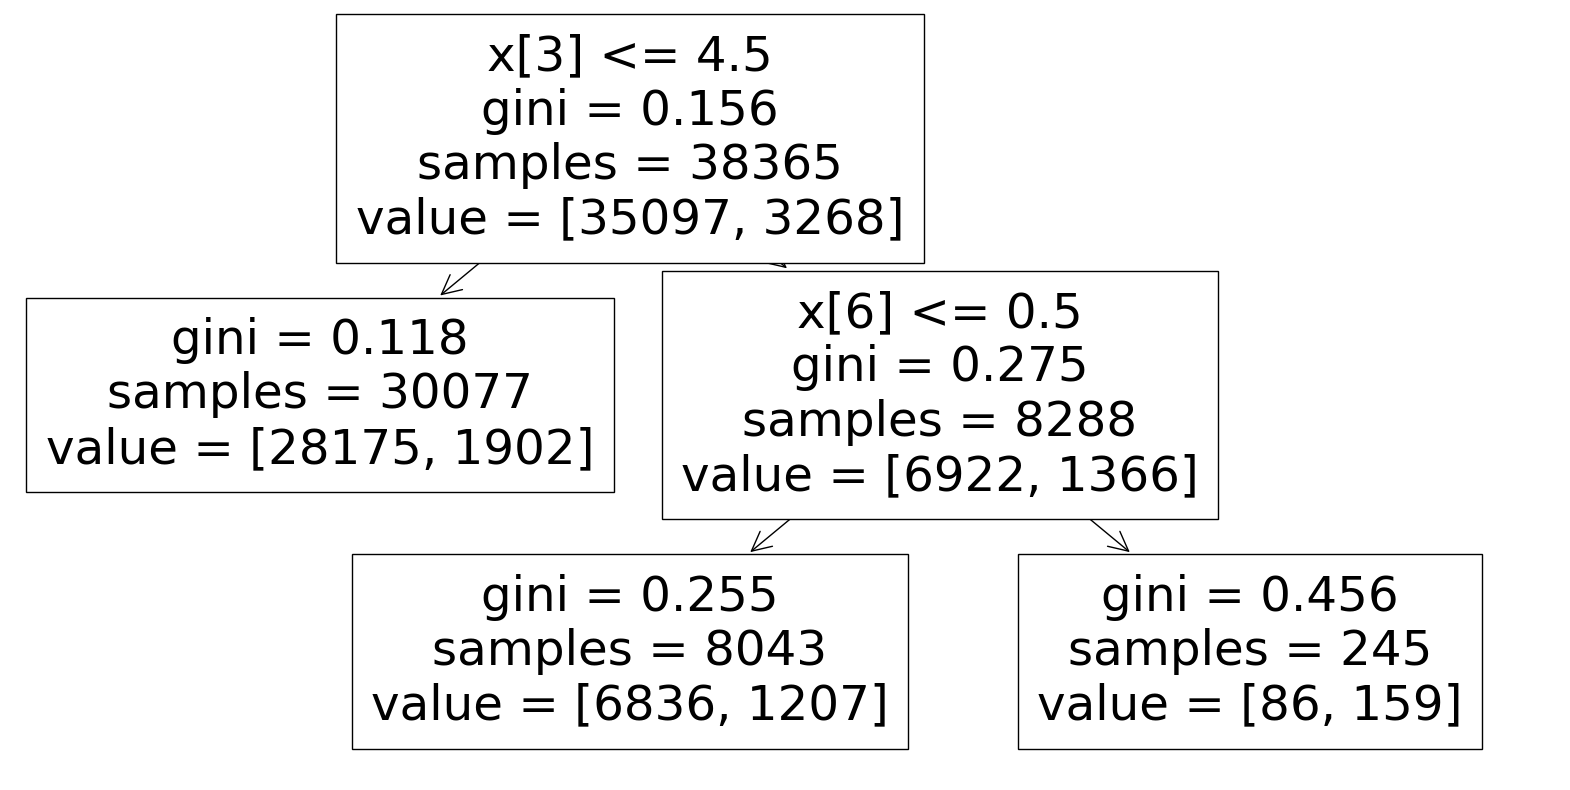

In [104]:
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(dtree)
plt.show()

In [63]:
f1_score(ytest,pred)

0.43398268398268397